In [366]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [367]:
# TODO: create seperate a file for preprocessed data??
df = pd.read_csv('../data/raw/average-monthly-surface-temperature.csv')
df.reset_index()
df = df.rename(columns={'Average surface temperature': 'Daily Average Temp', 'Average surface temperature.1': 'Monthly Average Temp', 'year' : 'Year'})

In [368]:
df.sample(5)

,Entity,Code,Year,Day,Daily Average Temp,Monthly Average Temp
164232,South Africa,ZAF,1941,1941-01-15,23.617691,17.885820
100130,Kosovo,OWID_KOS,1954,1954-03-15,4.558021,8.682597
59170,Estonia,EST,1940,1940-11-15,2.207747,3.559741
91808,Israel,ISR,1940,1940-09-15,23.565996,19.177680
19664,Benin,BEN,1963,1963-09-15,25.283562,26.888960


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Entity                198900 non-null  object 
 1   Code                  198900 non-null  object 
 2   Year                  198900 non-null  int64  
 3   Day                   198900 non-null  object 
 4   Daily Average Temp    198900 non-null  float64
 5   Monthly Average Temp  198900 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.1+ MB


In [370]:
df.describe()

,Year,Daily Average Temp,Monthly Average Temp
count,198900.00000,198900.000000,198900.000000
mean,1982.00000,18.072073,18.072073
std,24.53575,10.246142,8.710114
min,1940.00000,-36.240032,-21.529121
25%,1961.00000,12.304079,10.569263
50%,1982.00000,22.055794,21.856285
75%,2003.00000,25.317015,25.142885
max,2024.00000,39.889374,29.794220


# Missing values

In [371]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# there are no missing values

Missing Values:
Entity                  0
Code                    0
Year                    0
Day                     0
Daily Average Temp      0
Monthly Average Temp    0
dtype: int64


# Duplicates

In [372]:
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

# there are no duplicate rows

Duplicate Rows:
Empty DataFrame
Columns: [Entity, Code, Year, Day, Daily Average Temp, Monthly Average Temp]
Index: []


# Convert Data Types

In [ ]:
df["Day"] = pd.to_datetime(df["Day"], format='%Y-%m-%d')
df["Month"] = pd.to_datetime(df["Day"]).dt.month
df['Year'] = pd.to_datetime(df['Day']).dt.year

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Entity                198900 non-null  object        
 1   Code                  198900 non-null  object        
 2   Year                  198900 non-null  int32         
 3   Day                   198900 non-null  datetime64[ns]
 4   Daily Average Temp    198900 non-null  float64       
 5   Monthly Average Temp  198900 non-null  float64       
 6   Month                 198900 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), object(2)
memory usage: 9.1+ MB


In [374]:
df.sample(10)

,Entity,Code,Year,Day,Daily Average Temp,Monthly Average Temp,Month
57787,Equatorial Guinea,GNQ,1995,1995-08-15,22.734879,23.506586,8
176837,Tanzania,TZA,1971,1971-06-15,20.032345,21.619543,6
193807,Vietnam,VNM,1940,1940-08-15,24.340563,22.372078,8
38228,China,CHN,1980,1980-09-15,13.432949,6.329942,9
53338,East Timor,TLS,1964,1964-11-15,24.227322,23.861465,11
101913,Kuwait,KWT,2017,2017-10-15,28.800684,26.966446,10
196258,Yemen,YEM,1974,1974-11-15,19.900965,24.003538,11
103138,Laos,LAO,1949,1949-11-15,20.365154,22.339846,11
62040,Ethiopia,ETH,2010,2010-01-15,23.025475,23.534340,1
5348,Angola,AGO,1960,1960-09-15,22.783115,21.225050,9


# Verifying Entity and Code columns

In [375]:
for name, num_of_occurrences in df['Entity'].value_counts().items():
    # check if every country has the same number of entries
    if num_of_occurrences != 1020:
        print(name, "has", num_of_occurrences)

for name in df["Entity"].unique():
    # check if every country name (Entity column) matches the country code 
    correct_code = df.loc[df["Entity"] == name].iloc[0]["Code"]      
    incorrect_rows = df.loc[(df["Entity"] == name) & (df["Code"] != correct_code)]
    if incorrect_rows.shape[0] > 0:
          display(incorrect_rows)


# Data Visualization

In [376]:
df

,Entity,Code,Year,Day,Daily Average Temp,Monthly Average Temp,Month
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695,1
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695,2
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695,3
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695,4
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695,5
...,...,...,...,...,...,...,...
198895,Zimbabwe,ZWE,2024,2024-08-15,20.559408,22.921250,8
198896,Zimbabwe,ZWE,2024,2024-09-15,23.642931,22.921250,9
198897,Zimbabwe,ZWE,2024,2024-10-15,24.407030,22.921250,10
198898,Zimbabwe,ZWE,2024,2024-11-15,25.672321,22.921250,11


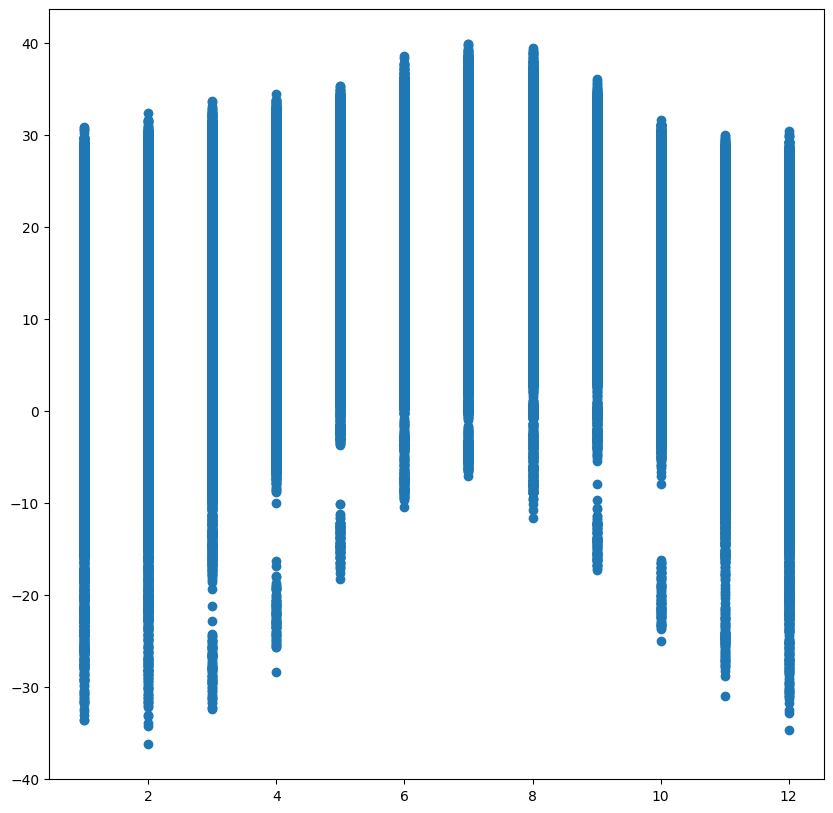

In [377]:
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(x='Month', y='Daily Average Temp', data=df)

In [378]:
df.groupby(["Entity", "Year"], as_index=False)["Monthly Average Temp"].first()

,Entity,Year,Monthly Average Temp
0,Afghanistan,1940,11.327695
1,Afghanistan,1941,13.324756
2,Afghanistan,1942,12.885448
3,Afghanistan,1943,11.524769
4,Afghanistan,1944,12.143665
...,...,...,...
16570,Zimbabwe,2020,21.785585
16571,Zimbabwe,2021,21.573133
16572,Zimbabwe,2022,21.591951
16573,Zimbabwe,2023,22.349144


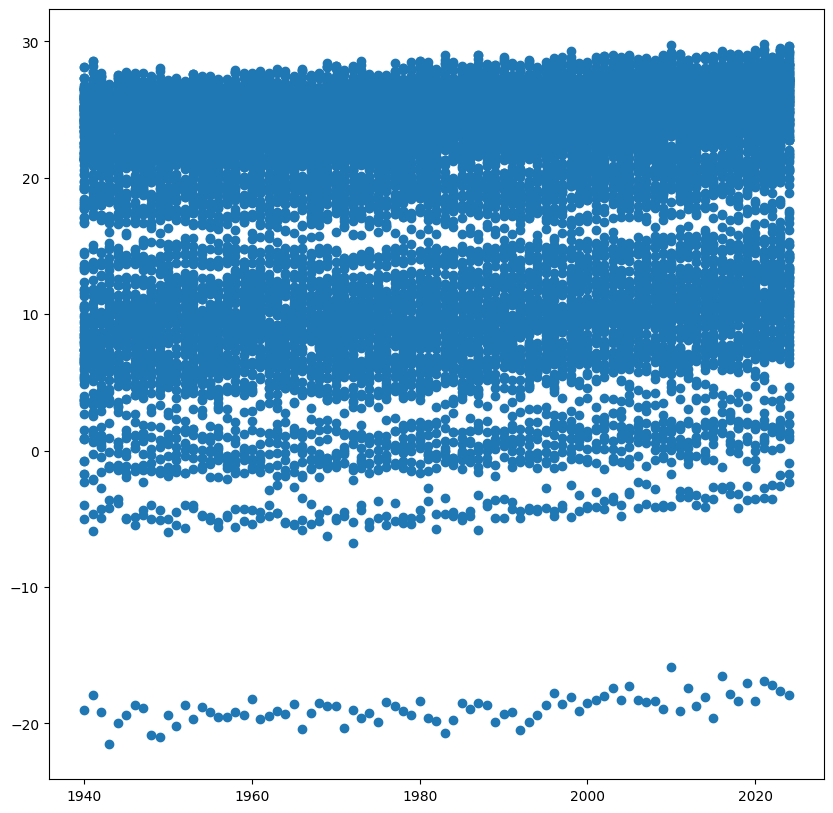

In [379]:
plt.rcParams["figure.figsize"] = (10,10)
#colors = itertools.cycle(["r", "b", "g"])
plt.scatter(x='Year', y='Monthly Average Temp', data=df.groupby(["Entity", "Year"], as_index=False)["Monthly Average Temp"].first())


# Drop Unnecessary Columns

In [380]:
# having both "Enity" and "Code" is redundant, so I'm dropping a column
df.drop("Code", axis=1, inplace=True, errors='ignore')
df

,Entity,Year,Day,Daily Average Temp,Monthly Average Temp,Month
0,Afghanistan,1940,1940-01-15,-2.032494,11.327695,1
1,Afghanistan,1940,1940-02-15,-0.733503,11.327695,2
2,Afghanistan,1940,1940-03-15,1.999134,11.327695,3
3,Afghanistan,1940,1940-04-15,10.199754,11.327695,4
4,Afghanistan,1940,1940-05-15,17.942135,11.327695,5
...,...,...,...,...,...,...
198895,Zimbabwe,2024,2024-08-15,20.559408,22.921250,8
198896,Zimbabwe,2024,2024-09-15,23.642931,22.921250,9
198897,Zimbabwe,2024,2024-10-15,24.407030,22.921250,10
198898,Zimbabwe,2024,2024-11-15,25.672321,22.921250,11


# Scale Data

# Encode Entity Column
Use One-Hot-Encoding

In [381]:
from sklearn.preprocessing import OneHotEncoder

In [382]:
df['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Falkland Islands', 'Faroe Islands',
       'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 

In [383]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
ohe_transform = ohe.fit_transform(df[["Entity"]])
encoded_df = df.drop('Entity', axis=1) 
encoded_df = pd.concat([encoded_df, ohe_transform], axis=1)
encoded_df

,Year,Day,Daily Average Temp,Monthly Average Temp,Month,Entity_Afghanistan,Entity_Albania,Entity_Algeria,Entity_American Samoa,Entity_Andorra,...,Entity_United States Virgin Islands,Entity_Uruguay,Entity_Uzbekistan,Entity_Vanuatu,Entity_Venezuela,Entity_Vietnam,Entity_World,Entity_Yemen,Entity_Zambia,Entity_Zimbabwe
0,1940,1940-01-15,-2.032494,11.327695,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1940,1940-02-15,-0.733503,11.327695,2,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1940,1940-03-15,1.999134,11.327695,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1940,1940-04-15,10.199754,11.327695,4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1940,1940-05-15,17.942135,11.327695,5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,2024,2024-08-15,20.559408,22.921250,8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
198896,2024,2024-09-15,23.642931,22.921250,9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
198897,2024,2024-10-15,24.407030,22.921250,10,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
198898,2024,2024-11-15,25.672321,22.921250,11,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Export preprocessed dataset to new CSV file

In [384]:
encoded_df.to_csv('../data/processed/preprocessed_data.csv', index=False)